In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_csv('AB_NYC_2019.csv')
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (48895, 16)
Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
if 'reviews_per_month' in df.columns:
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Drop rows with missing essential info
if 'host_name' in df.columns and 'name' in df.columns:
    df = df.dropna(subset=['host_name', 'name'])

# Drop 'last_review' if it exists
if 'last_review' in df.columns:
    df = df.drop(['last_review'], axis=1)

/tmp/ipykernel_4101/2279871641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette='Set2')


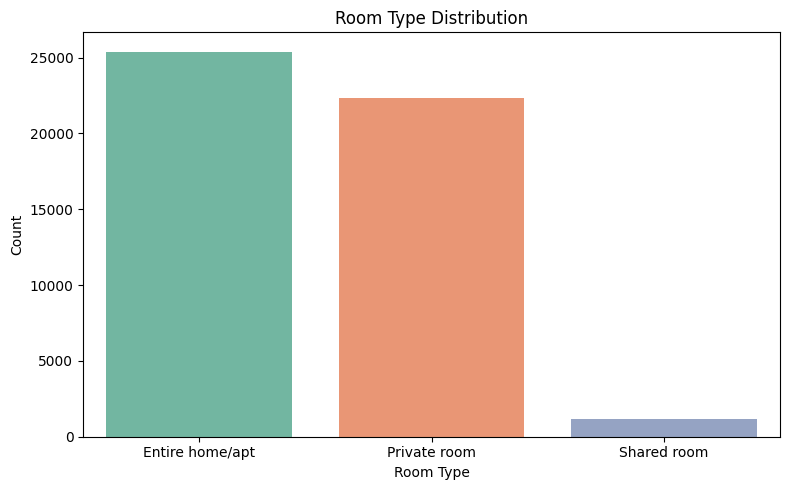

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette='Set2')
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("room_type_distribution.png")
plt.show()

/tmp/ipykernel_4101/4238612936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='Set3')


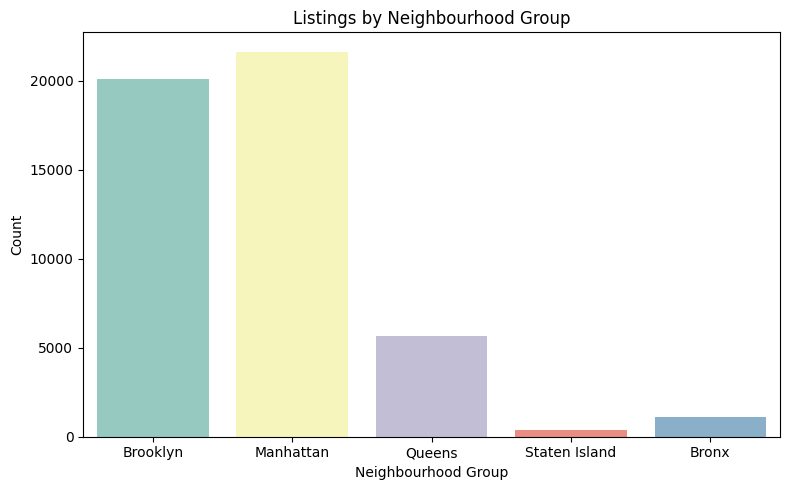

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='neighbourhood_group', palette='Set3')
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("neighbourhood_group_distribution.png")
plt.show()

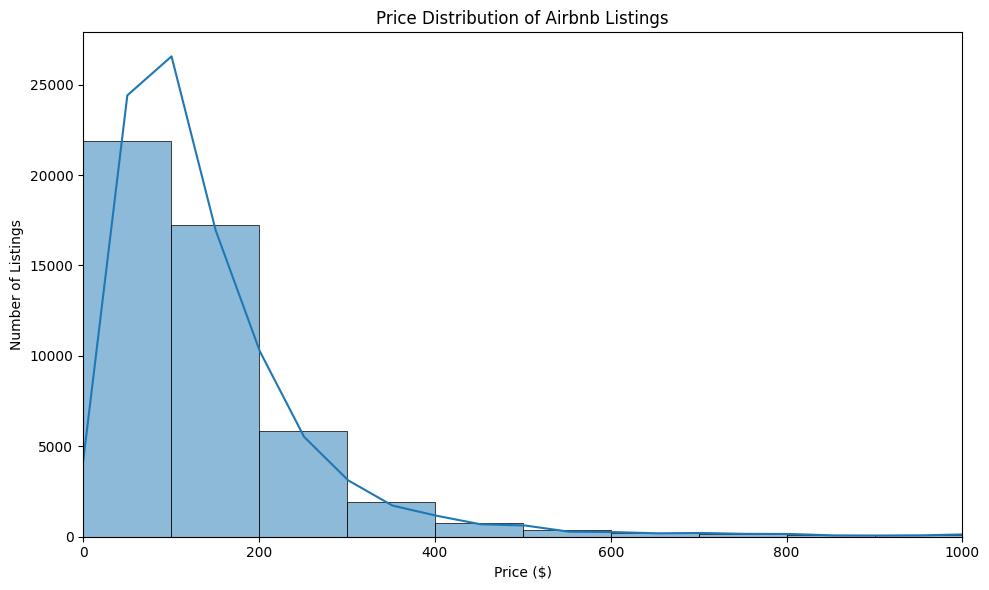

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.savefig("price_distribution.png")
plt.show()

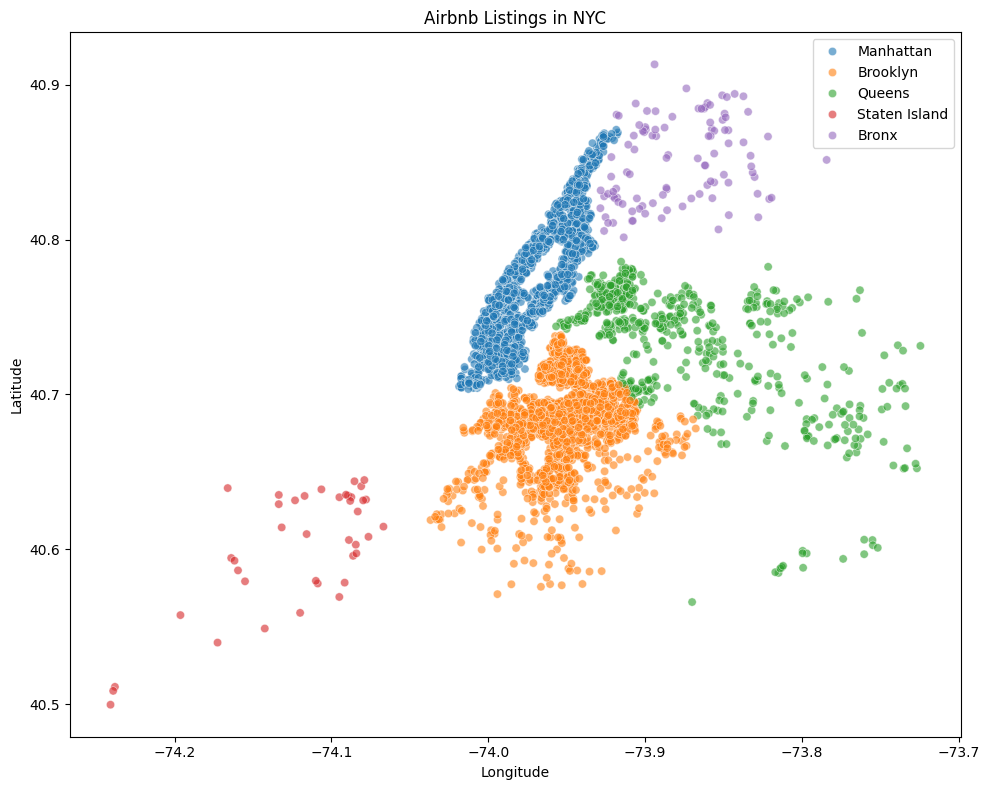

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df.sample(5000), x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.6)
plt.title("Airbnb Listings in NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("nyc_airbnb_map.png")
plt.show()


/tmp/ipykernel_4101/1854923529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')


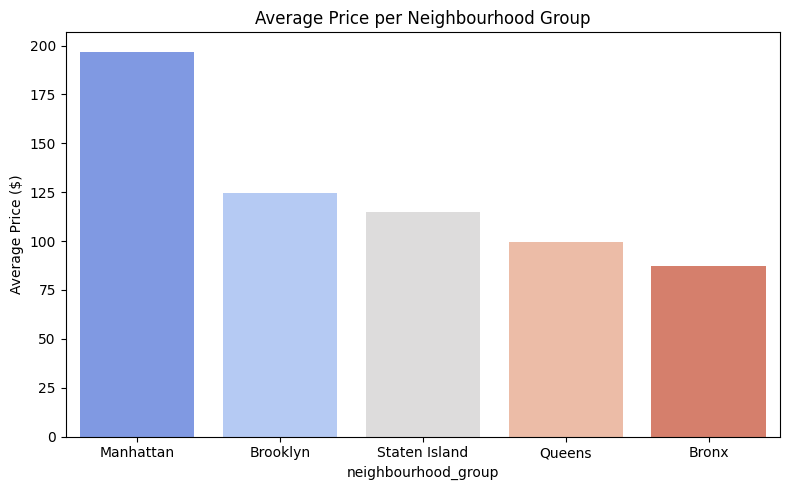

In [15]:
plt.figure(figsize=(8,5))
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')
plt.title("Average Price per Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.savefig("avg_price_neighbourhood.png")
plt.show()

In [16]:
df.to_csv("cleaned_airbnb_nyc_2019.csv", index=False)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [18]:
# Select features and target
features = df[['room_type', 'neighbourhood_group', 'minimum_nights', 'number_of_reviews', 'availability_365']]
target = df['price']

# One-hot encode categorical features
df_encoded = pd.get_dummies(features, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)


In [19]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 73.06494574803848
RMSE: 213.9253954036664
R² Score: 0.09319220338215506


In [20]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MAE: 75.86701917698886
RMSE: 226.97772487483473
R² Score: -0.02083848837080282


In [22]:
# Function to recommend price based on input features
def recommend_price(room_type, neighbourhood_group, minimum_nights, number_of_reviews, availability_365):
    input_data = pd.DataFrame({
        'minimum_nights': [minimum_nights],
        'number_of_reviews': [number_of_reviews],
        'availability_365': [availability_365],
        'room_type_Private room': [1 if room_type == 'Private room' else 0],
        'room_type_Shared room': [1 if room_type == 'Shared room' else 0],
        'neighbourhood_group_Brooklyn': [1 if neighbourhood_group == 'Brooklyn' else 0],
        'neighbourhood_group_Manhattan': [1 if neighbourhood_group == 'Manhattan' else 0],
        'neighbourhood_group_Queens': [1 if neighbourhood_group == 'Queens' else 0],
        'neighbourhood_group_Staten Island': [1 if neighbourhood_group == 'Staten Island' else 0],
    })
    
    prediction = rf_model.predict(input_data)[0]
    return round(prediction, 2)


In [23]:
# Example usage
recommend_price('Private room', 'Manhattan', 3, 15, 180)


np.float64(83.27)

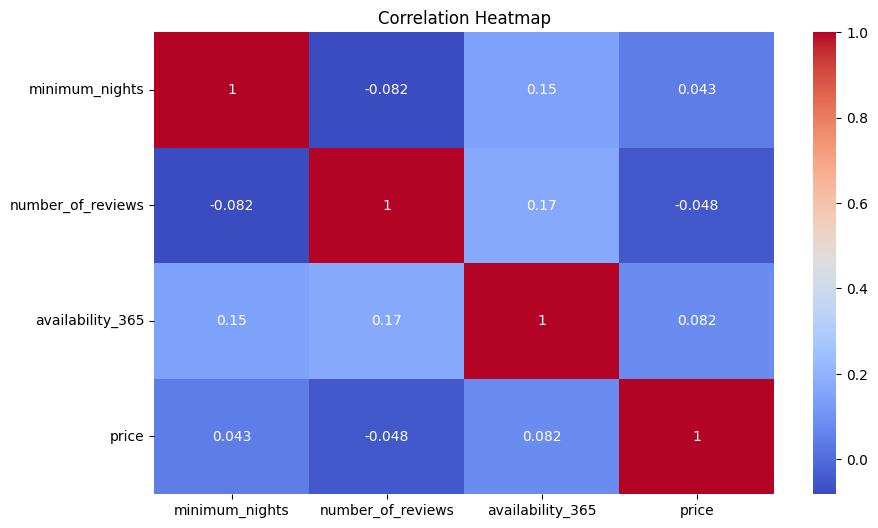

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['minimum_nights', 'number_of_reviews', 'availability_365', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


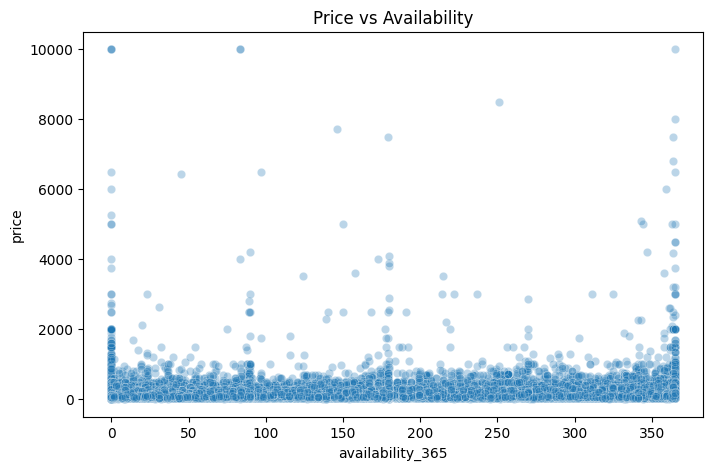

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.3)
plt.title("Price vs Availability")
plt.show()


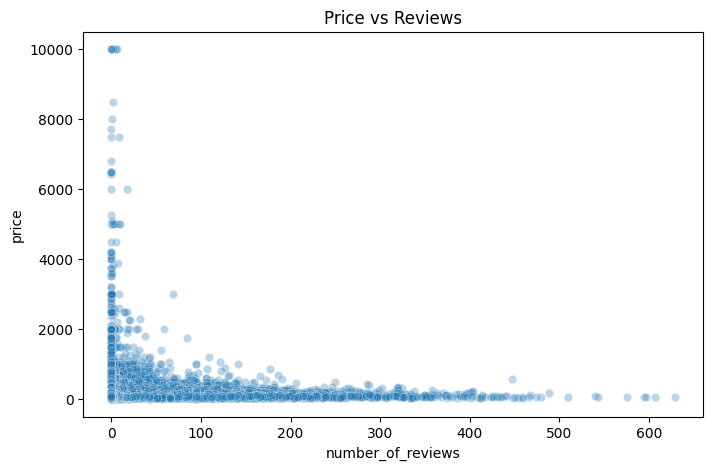

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.3)
plt.title("Price vs Reviews")
plt.show()
